# Basic classification: Classify images of clothing

Author: Amir Fawwaz

Affliation: HT Consulting (Asia) Sdn. Bhd., Kelana Jaya, Malaysia

Published: 19 July 2024

##### Copyright 2018 The TensorFlow Authors.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [2]:
DATASET_SIZE = 70000
TRAIN_RATIO = 0.7
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.1

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_RATIO))
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))

In [4]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", y_train.shape)
print("Fashion MNIST val -  rows:",X_val.shape[0]," columns:", y_val.shape)
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", y_test.shape)

Fashion MNIST train -  rows: 48999  columns: (48999,)
Fashion MNIST val -  rows: 14000  columns: (14000,)
Fashion MNIST test -  rows: 7001  columns: (7001,)


In [5]:
X_train.shape

(48999, 28, 28)

In [6]:
train_images = X_train / 255.0
val_images = X_val / 255.0
test_images = X_test / 255.0

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. _This layer has **no parameters** to learn; it only **reformats** the data._

<table>
  <tr><td>
    <img src="https://gitlab.com/knabenphysik/jrp_note/-/raw/main/asset/flatten.png"
         alt="Flatten layer"  width="400">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://keras.io/api/layers/reshaping_layers/flatten/">Flatten layer</a> <br/>&nbsp;
  </td></tr>
</table>

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

<table>
  <tr><td>
    <img src="https://gitlab.com/knabenphysik/jrp_note/-/raw/main/asset/simple_nn.png"
         alt="Dense Layer"  width="300">
  </td></tr>
  <tr><td align="center">
    <b>Figure 2.</b> <a href="https://keras.io/api/layers/core_layers/dense/">Dense Layer with 4 neurons</a> <br/>&nbsp;
  </td></tr>
</table>

tf.keras API provides a way to summarize a model.

The summary is textual and includes information about:

- The layers and their order in the model.
- The output shape of each layer.
- The number of parameters (weights) in each layer.
- The total number of parameters (weights) in the model.

The summary can be created by calling the `summary()` function on the model that returns a string that in turn can be printed.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Compile the model

_**Hyperparameter tuning**_ or optimization is a major challenge when using ML and DL algorithms. Hyperparameters control almost everything in these algorithms. Hyperparameters are configuration variables that are set before the training process of a model begins. For neural network, these are common hyperparameters to configure:

- number of Hidden Layers
- number of Neurons Per Hidden Layer
- learning Rate
- batch Size
- epochs
- optimizer algorithm

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.

* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

For supervised learning especially neural network is driven by the optimization of an error function of the output. A common objective is the minimization of loss function or the cross-entropy of the network's output and the target output.

<table>
  <tr><td>
    <img src="https://gitlab.com/knabenphysik/jrp_note/-/raw/main/asset/optimize_loss.jpg"
         alt="Loss optimization"  width="700">
  </td></tr>
  <tr><td align="center">
    <b>Figure 3.</b> <a href="https://keras.io/api/layers/core_layers/dense/">Loss optimization</a> <br/>&nbsp;
  </td></tr>
</table>



In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
history = model.fit(train_images, y_train, validation_data=(val_images,y_val), epochs=30)

Epoch 1/30
1532/1532 [==============================] - 2s 1ms/step - loss: 0.2870 - accuracy: 0.9171 - val_loss: 0.1519 - val_accuracy: 0.9549
Epoch 2/30
1532/1532 [==============================] - 2s 1ms/step - loss: 0.1264 - accuracy: 0.9631 - val_loss: 0.1255 - val_accuracy: 0.9601
Epoch 3/30
1532/1532 [==============================] - 2s 1ms/step - loss: 0.0867 - accuracy: 0.9740 - val_loss: 0.1063 - val_accuracy: 0.9679
Epoch 4/30
1532/1532 [==============================] - 2s 1ms/step - loss: 0.0649 - accuracy: 0.9804 - val_loss: 0.0861 - val_accuracy: 0.9724
Epoch 5/30
1532/1532 [==============================] - 2s 1ms/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 0.0918 - val_accuracy: 0.9714
Epoch 6/30
1532/1532 [==============================] - 2s 1ms/step - loss: 0.0401 - accuracy: 0.9872 - val_loss: 0.0892 - val_accuracy: 0.9731
Epoch 7/30
1532/1532 [==============================] - 2s 1ms/step - loss: 0.0315 - accuracy: 0.9901 - val_loss: 0.0763 - val_accuracy:

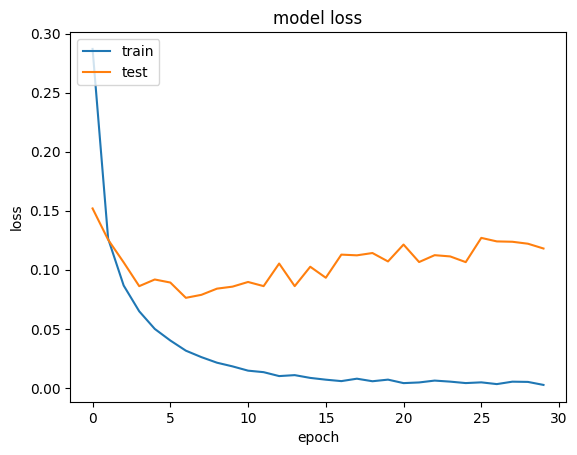

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(test_images,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

219/219 - 0s - loss: 0.1168 - accuracy: 0.9804 - 196ms/epoch - 894us/step

Test accuracy: 0.9804313778877258


In [13]:
#Make predictions
y_probs = model.predict(test_images)

#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

219/219 [==============================] - 0s 571us/step


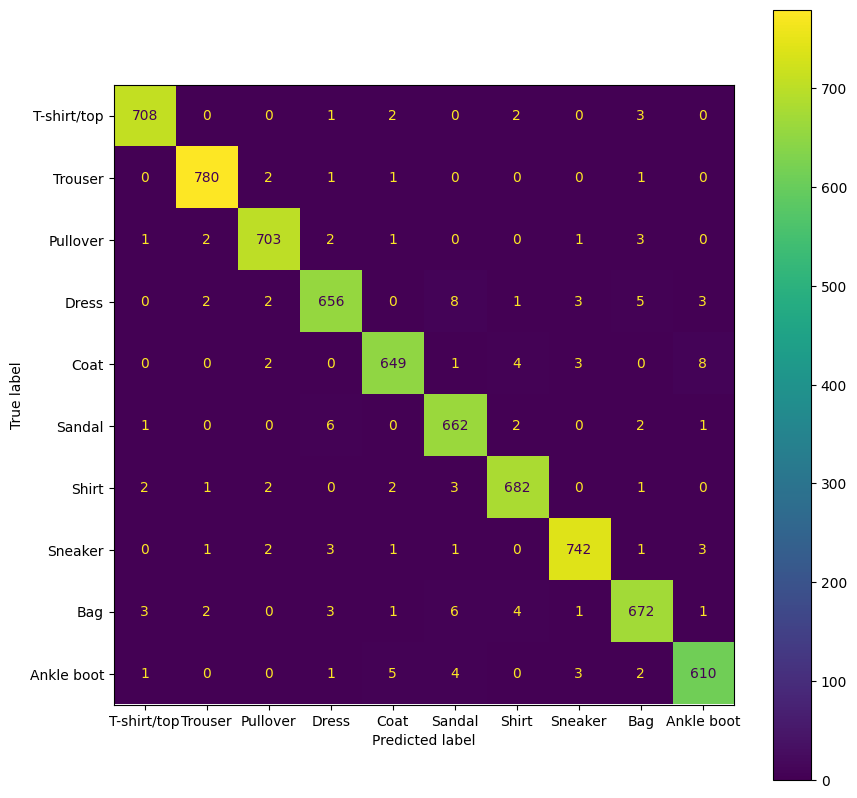

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Confusion matrix
cm=confusion_matrix(y_test,y_preds)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

In [15]:
print(classification_report(y_preds,y_test, target_names = class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.99      0.99      0.99       716
     Trouser       0.99      0.99      0.99       788
    Pullover       0.99      0.99      0.99       713
       Dress       0.96      0.97      0.97       673
        Coat       0.97      0.98      0.98       662
      Sandal       0.98      0.97      0.97       685
       Shirt       0.98      0.98      0.98       695
     Sneaker       0.98      0.99      0.98       753
         Bag       0.97      0.97      0.97       690
  Ankle boot       0.97      0.97      0.97       626

    accuracy                           0.98      7001
   macro avg       0.98      0.98      0.98      7001
weighted avg       0.98      0.98      0.98      7001



In [17]:
# save final model
model.save("my_model.HDF5")

INFO:tensorflow:Assets written to: my_model.HDF5\assets
